<a href="https://colab.research.google.com/github/CharlesPrado23/Pos_Clustering_Modulo-I/blob/main/StockMarket_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

In [3]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navistar':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'Symantec':'SYMC',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mistubishi':'MSBHY',
    'Sony':'SNE',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}


In [4]:
data_source = 'yahoo' # Source of data is yahoo finance.
start_date = '01/01/2010'
end_date = '31/12/2023'
df = data.DataReader(list(companies_dict.values()),'stooq',start_date,end_date)

<ipython-input-4-10827976e7ea>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = data.DataReader(list(companies_dict.values()),'stooq',start_date,end_date)
<ipython-input-4-10827976e7ea>:4: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = data.DataReader(list(companies_dict.values()),'stooq',start_date,end_date)


In [5]:
df

Attributes     Close                                                   \
Symbols         AMZN       AAPL      WBA       NOC       BA       LMT   
2010-01-04    6.6950    6.45451  26.9484   40.3024   45.128   52.2918   
2010-01-05    6.7345    6.46558  26.7321   40.3677   46.607   52.8333   
2010-01-06    6.6125    6.36237  26.5323   40.5269   48.020   52.0594   
2010-01-07    6.5000    6.35113  26.6916   40.9456   49.966   50.6298   
2010-01-08    6.6760    6.39387  26.7254   40.7210   49.487   51.4461   
...              ...        ...      ...       ...      ...       ...   
2023-12-22  153.4200  192.86800  26.2200  463.1300  260.440  448.2200   
2023-12-26  153.4100  192.32000  26.6100  464.5000  262.790  450.1800   
2023-12-27  153.3400  192.42000  26.6400  464.2200  262.100  448.9700   
2023-12-28  153.3800  192.84800  26.6000  465.6800  260.350  451.2300   
2023-12-29  151.9400  191.80300  26.1100  468.1400  260.660  453.2400   

Attributes                                         ...        Volume  \
Symbols          MCD     INTC       IBM       TXN  ...           PEP   
2010-01-04   44.8885  14.5760   87.0210   19.1965  ...  9.341416e+06   
2010-01-05   44.5463  14.5681   85.9758   19.0851  ...  1.260125e+07   
2010-01-06   43.9384  14.5174   85.4146   18.9461  ...  1.418046e+07   
2010-01-07   44.2649  14.3777   85.1326   19.0023  ...  1.530857e+07   
2010-01-08   44.2158  14.5370   85.9758   19.4399  ...  1.230404e+07   
...              ...      ...       ...       ...  ...           ...   
2023-12-22  291.7000  48.0000  162.1400  168.2400  ...  3.030355e+06   
2023-12-26  292.8600  50.5000  163.2100  170.8100  ...  2.779405e+06   
2023-12-27  294.5500  50.7600  163.4600  171.2300  ...  3.502620e+06   
2023-12-28  295.8400  50.3900  163.7500  171.7200  ...  2.911277e+06   
2023-12-29  296.5100  50.2500  163.5500  170.4600  ...  3.291629e+06   

Attributes                                                           \
Symbols               KO           JNJ             TM           HMC   
2010-01-04  2.009807e+07  1.338076e+07  318141.040574  4.791349e+05   
2010-01-05  3.351595e+07  1.497823e+07  573792.347105  7.549179e+05   
2010-01-06  2.791347e+07  1.854080e+07  479306.276338  3.697248e+05   
2010-01-07  1.918011e+07  1.533295e+07  464170.756787  5.157735e+05   
2010-01-08  4.160322e+07  1.111308e+07  432504.925232  1.195643e+06   
...                  ...           ...            ...           ...   
2023-12-22  9.029440e+06  3.798865e+06  322893.000000  6.927470e+05   
2023-12-26  6.422531e+06  4.170190e+06  198694.000000  4.813920e+05   
2023-12-27  8.560060e+06  5.288101e+06  195476.000000  5.586640e+05   
2023-12-28  8.400138e+06  4.377535e+06  243007.000000  4.501880e+05   
2023-12-29  9.244339e+06  4.313691e+06  223223.000000  7.335990e+05   

Attributes                                                          \
Symbols              XOM           CVX           VLO             F   
2010-01-04  4.468467e+07  1.628232e+07  2.133322e+07  9.307912e+07   
2010-01-05  4.848468e+07  1.620918e+07  2.358558e+07  3.288876e+08   
2010-01-06  5.631080e+07  1.762803e+07  2.331338e+07  3.060119e+08   
2010-01-07  4.365848e+07  1.540788e+07  1.666552e+07  1.990524e+08   
2010-01-08  3.999167e+07  9.000955e+06  1.919842e+07  1.992687e+08   
...                  ...           ...           ...           ...   
2023-12-22  1.292783e+07  6.396080e+06  2.279046e+06  4.376461e+07   
2023-12-26  1.683514e+07  5.165588e+06  1.807112e+06  2.629367e+07   
2023-12-27  1.455883e+07  5.337244e+06  1.358141e+06  3.989128e+07   
2023-12-28  1.632925e+07  8.147993e+06  1.661194e+06  2.668851e+07   
2023-12-29  1.774641e+07  7.658638e+06  1.964013e+06  4.096474e+07   

Attributes                
Symbols              BAC  
2010-01-04  2.143067e+08  
2010-01-05  2.482254e+08  
2010-01-06  2.433973e+08  
2010-01-07  3.801819e+08  
2010-01-08  2.611420e+08  
...                  ...  
2023-12-22  3.726586e+07  
2023-12-26  2.484544e+07  
2023-12-

In [6]:
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

In [7]:
movements = stock_close - stock_open

In [8]:
sum_of_movement = np.sum(movements,1)

In [9]:
df['High']

Symbols,AMZN,AAPL,WBA,NOC,BA,LMT,MCD,INTC,IBM,TXN,...,PEP,KO,JNJ,TM,HMC,XOM,CVX,VLO,F,BAC
2010-01-04,6.8305,6.46922,26.9484,40.3132,45.2970,52.3596,45.0981,14.6766,87.3694,19.6390,...,43.3735,19.7423,46.0593,69.2922,29.9129,43.1054,49.4891,11.8863,6.71396,13.2544
2010-01-05,6.7740,6.50241,26.8480,40.7289,46.8150,52.9325,44.8679,14.6502,86.6462,19.4093,...,43.7803,19.6650,45.7945,68.2593,29.6550,43.2202,49.7485,12.3042,7.34187,13.6404
2010-01-06,6.7365,6.49137,26.9417,40.5606,48.1880,52.5214,44.6240,14.6092,86.4072,19.2113,...,44.0432,19.4752,45.7427,69.2101,29.4374,43.9369,49.9874,12.6030,7.48533,13.9192
2010-01-07,6.6160,6.39407,26.7321,41.0871,50.0530,51.8484,44.5777,14.4900,85.5854,19.0713,...,43.2696,19.4507,45.6063,68.2089,28.8960,43.6033,49.7992,12.6206,7.63701,14.4564
2010-01-08,6.6840,6.39407,26.7852,41.1869,49.6290,51.6708,44.6240,14.5819,86.0187,19.4399,...,42.8765,19.2001,45.5425,69.8770,29.5742,43.4069,49.6548,12.5757,7.66816,14.3916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,154.3500,194.67200,26.5700,465.4300,262.8424,451.7400,292.4700,48.1557,162.4100,168.9223,...,168.1700,58.4600,156.5300,179.2400,30.7800,102.9400,152.3900,134.2450,12.46000,33.6700
2023-12-26,153.9750,193.15700,26.7300,465.7550,263.7599,451.4400,293.0500,50.5150,163.3100,171.5300,...,169.4200,58.7050,156.3500,180.3650,30.7088,103.0300,153.0100,134.3150,12.50000,33.9600
2023-12-27,154.7800,192.76800,26.7600,465.8500,264.6600,451.0185,294.6300,51.2800,163.6400,171.6200,...,169.4900,58.7700,156.5200,181.1100,30.5700,102.5500,152.9700,133.2500,12.45000,33.9500
2023-12-28,154.0800,193.92500,27.0200,467.4100,262.1000,451.8250,296.4700,50.8700,163.9600,172.3100,...,169.5400,58.8700,157.2400,181.6900,30.7150,101.6100,152.0200,132.0000,12.43000,33.9700


In [10]:
len(df['High'].columns)

24

In [11]:
list(df['High'].columns)

['AMZN',
 'AAPL',
 'WBA',
 'NOC',
 'BA',
 'LMT',
 'MCD',
 'INTC',
 'IBM',
 'TXN',
 'MA',
 'MSFT',
 'GE',
 'AXP',
 'PEP',
 'KO',
 'JNJ',
 'TM',
 'HMC',
 'XOM',
 'CVX',
 'VLO',
 'F',
 'BAC']

In [12]:
for i in range(len(df['High'].columns)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AMZN, Change:-60.2083999999994
company:AAPL, Change:148.00533999999948
company:WBA, Change:-18.294400000000053
company:NOC, Change:149.10230000000118
company:BA, Change:-85.41600000000032
company:LMT, Change:37.81610000000032
company:MCD, Change:51.43049999999906
company:INTC, Change:50.56680000000003
company:IBM, Change:131.88609999999971
company:TXN, Change:112.60120000000026
company:MA, Change:nan
company:MSFT, Change:138.75039999999976
company:GE, Change:-77.61899999999987
company:AXP, Change:12.63419999999947
company:PEP, Change:27.85409999999967
company:KO, Change:-0.8939000000000519
company:JNJ, Change:38.74359999999963
company:TM, Change:nan
company:HMC, Change:nan
company:XOM, Change:56.49610000000019
company:CVX, Change:nan
company:VLO, Change:nan
company:F, Change:-23.651729999999976
company:BAC, Change:-28.963379999999983


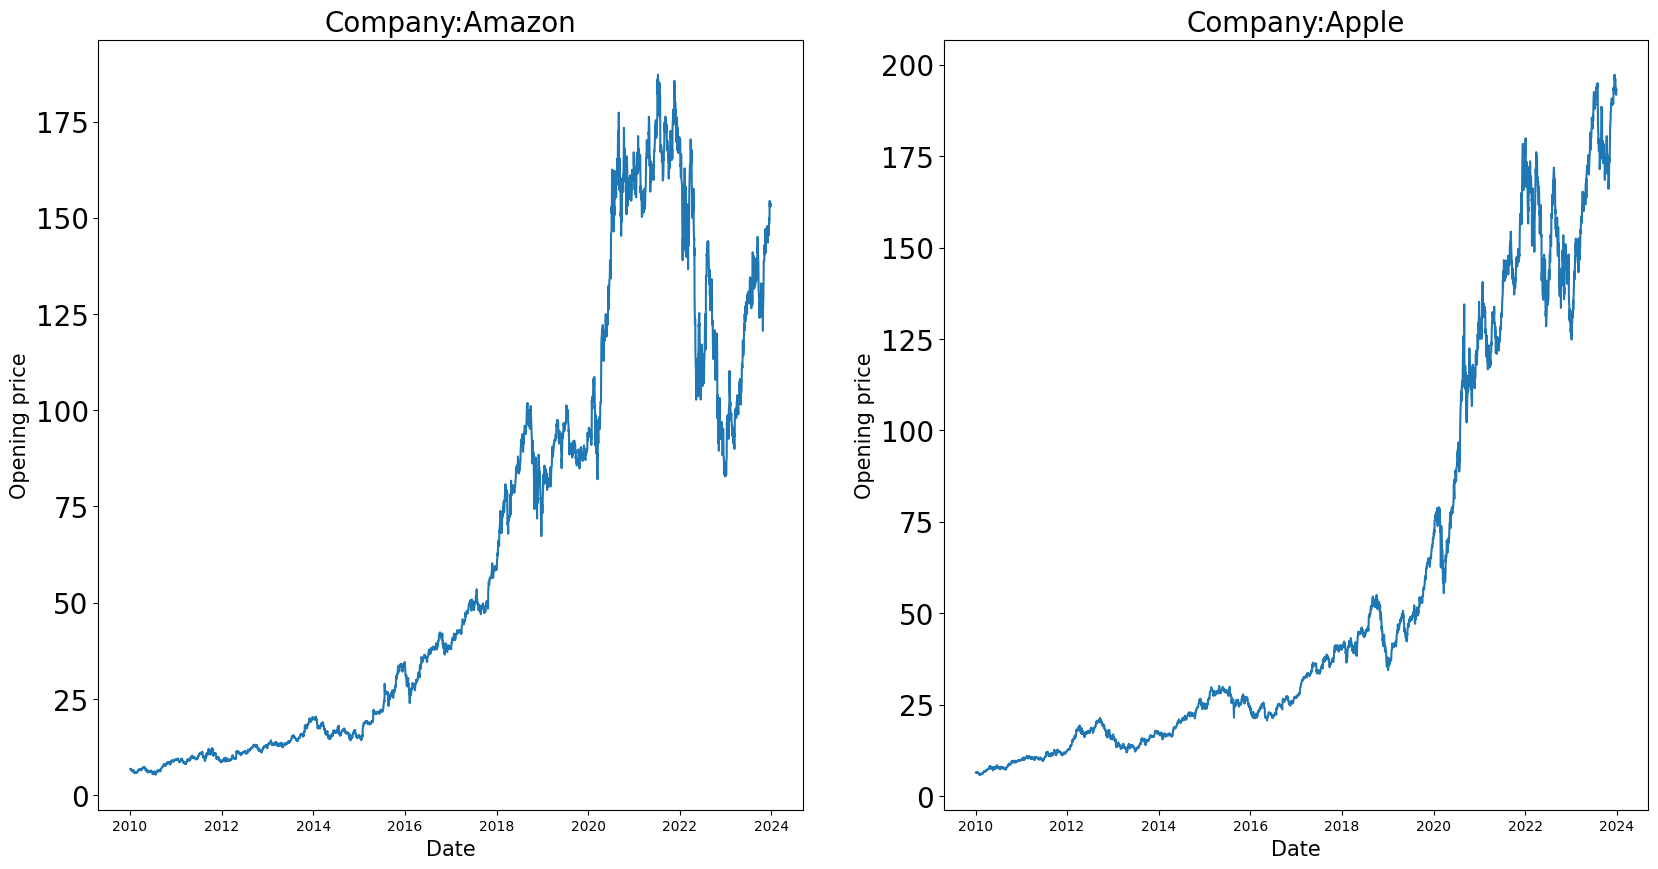

In [13]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AMZN'])
plt.subplot(1,2,2)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AAPL'])

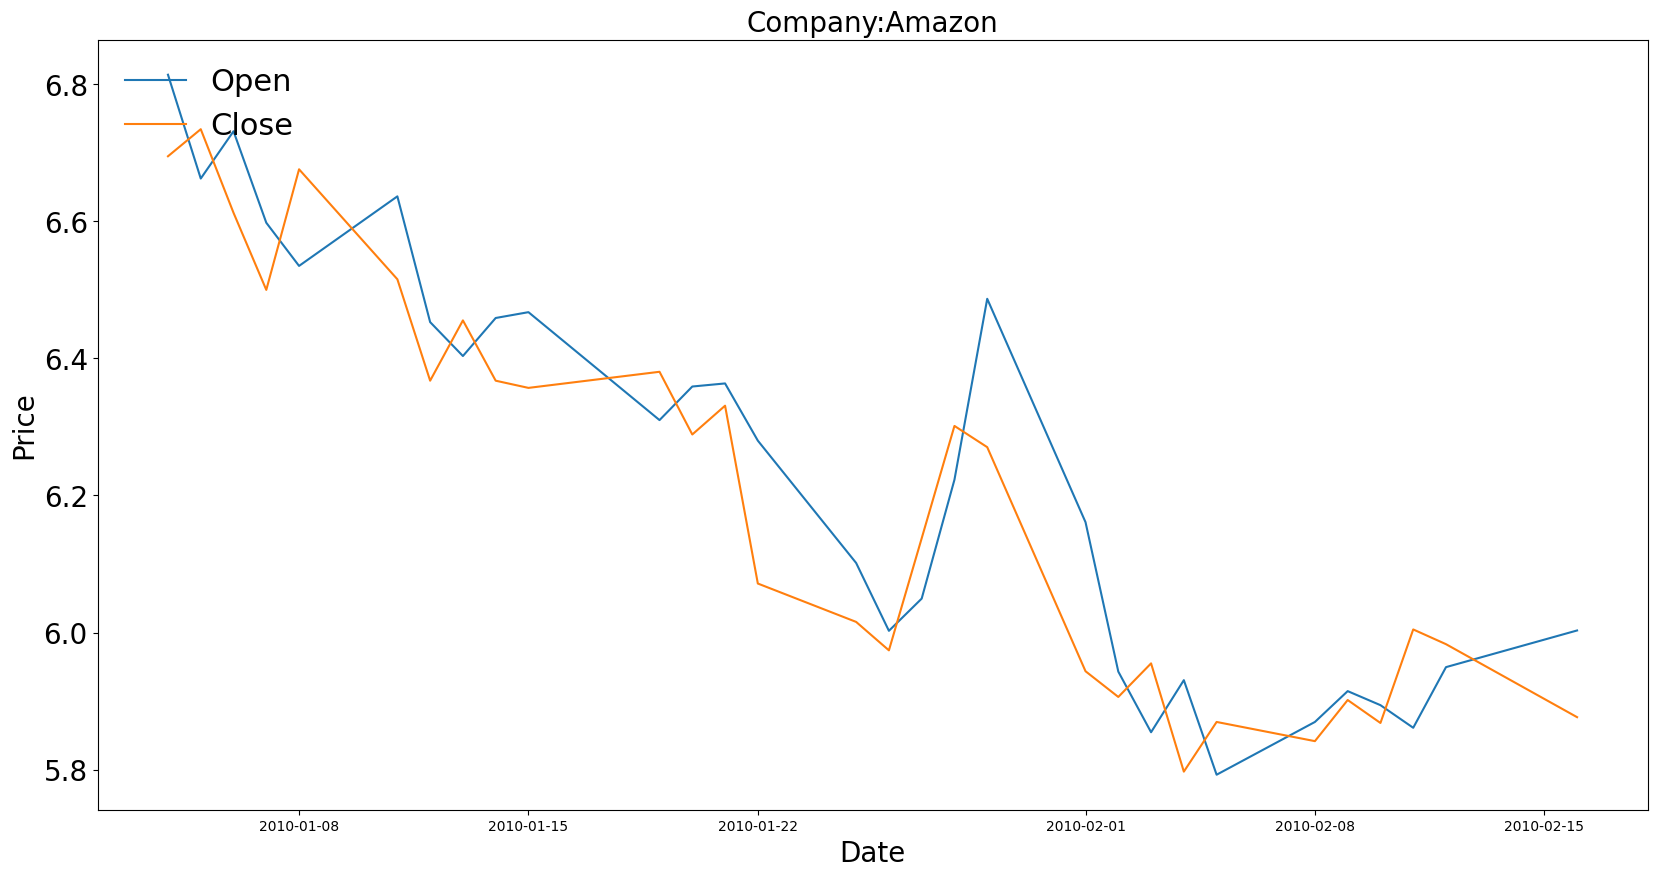

In [14]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

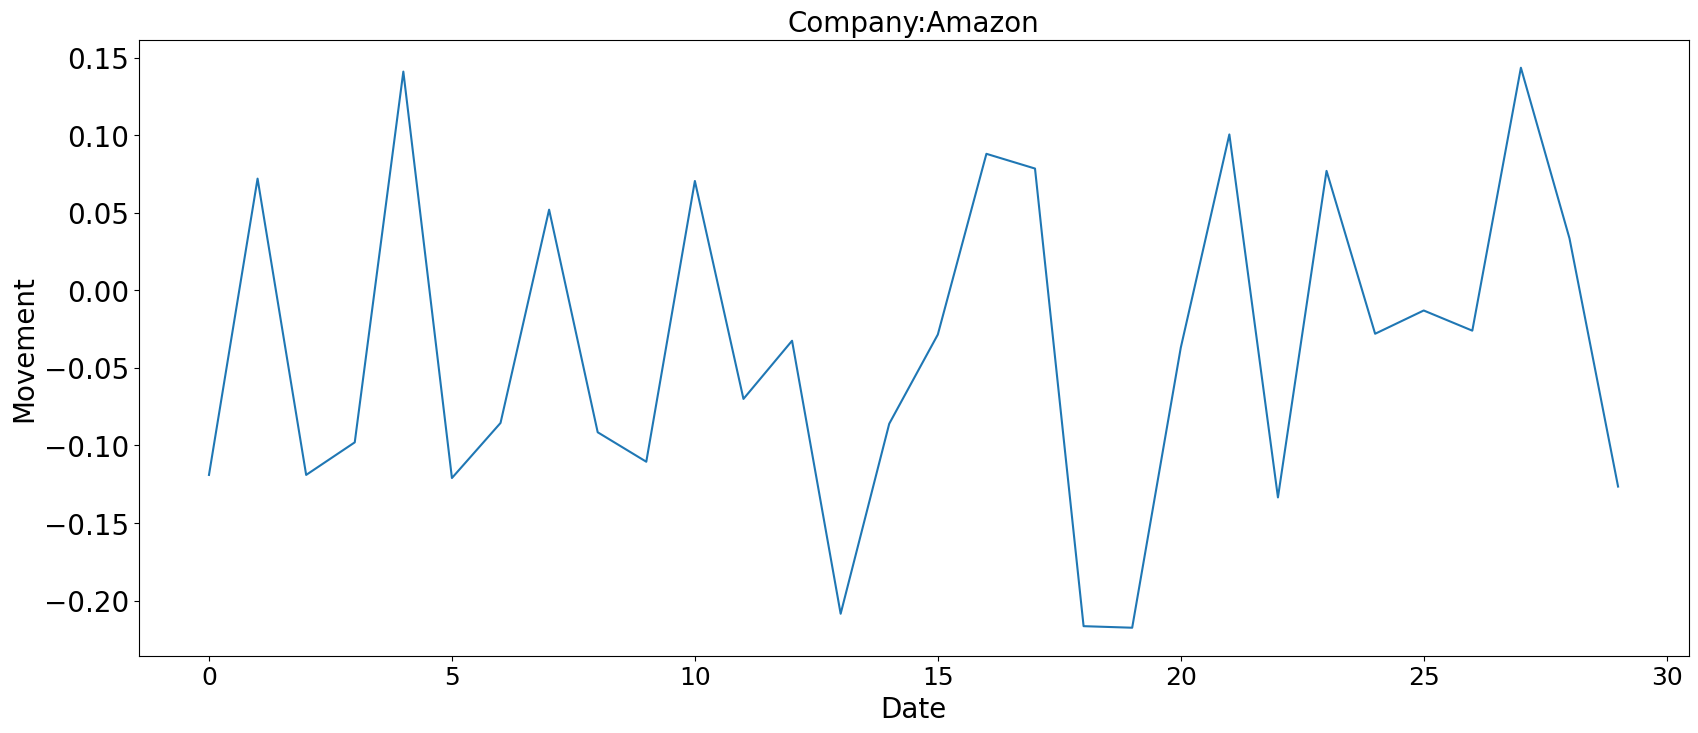

In [15]:
plt.figure(figsize = (20,8))
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])

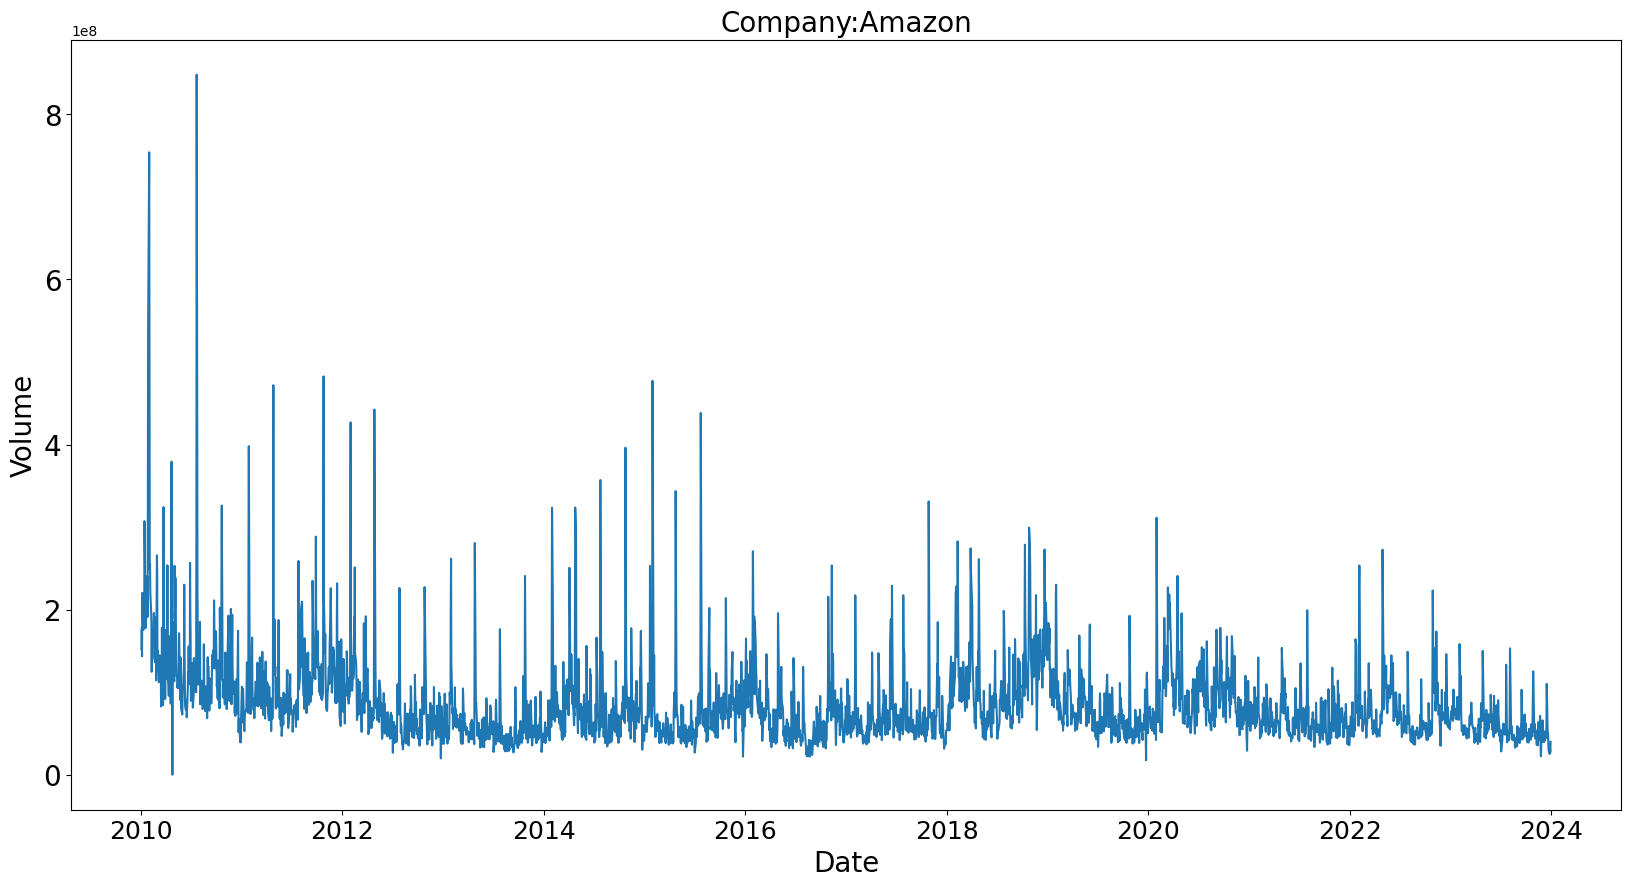

In [16]:
plt.figure(figsize = (20,10))
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df['Volume']['AMZN'],label = 'Open')

In [17]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
 open=df.iloc[0:60]['Open']['AMZN'],
 high=df.iloc[0:60]['High']['AMZN'],
 low=df.iloc[0:60]['Low']['AMZN'],
 close=df.iloc[0:60]['Close']['AMZN'])])
fig.show()

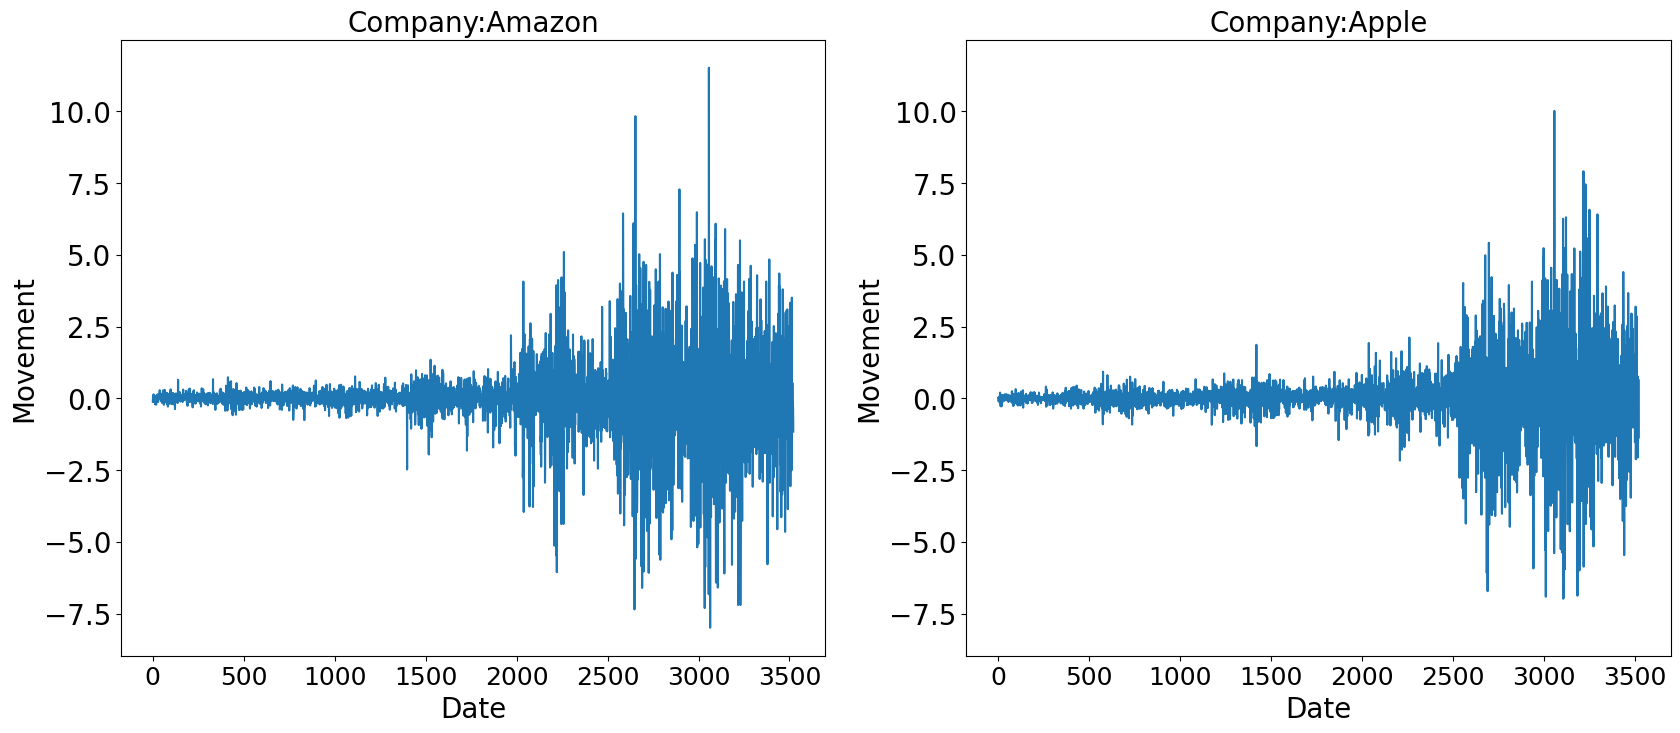

In [18]:
plt.figure(figsize = (20,8))
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0])
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

In [35]:
!pip install Normalizer


  Preparing metadata (setup.py) ... done
  Created wheel for Normalizer: filename=normalizer-0.2.1-py3-none-any.whl size=3738 sha256=9b37caeb0d186a3575eeedfa16cea5daf9309d77574e5c499a5953b9c366c762
  Stored in directory: /root/.cache/pip/wheels/e6/2d/f0/8d18562e55088a73a3afb58804a6fc36d66a20adbe4991ed6d
Successfully built Normalizer


In [19]:
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer

sImputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Define a SimpleImputer
movements = sImputer.fit_transform(movements) # Fit and transform

normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [20]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

sImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(sImputer,normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

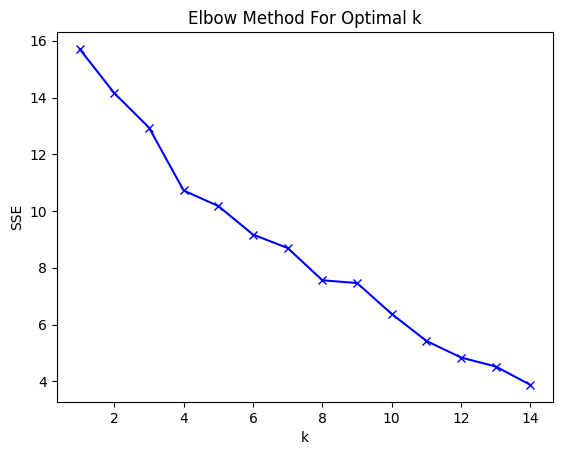

In [21]:
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    pipeline = make_pipeline(sImputer,normalizer,km)
    pipeline.fit(movements)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
from yellowbrick.cluster import KElbowVisualizer

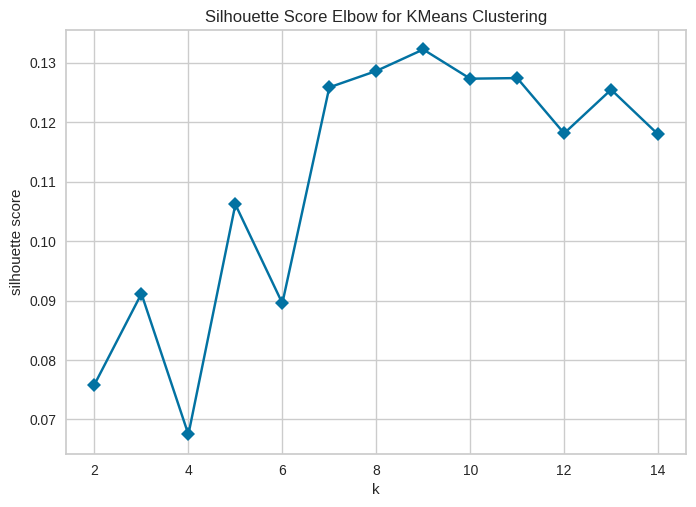

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
sImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(random_state=123)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(sImputer,normalizer)
movements = pipeline.fit_transform(movements)
#model = KMeans(random_state=123)
visualizer = KElbowVisualizer(kmeans, k=(2,15),metric='silhouette',locate_elbow=False, timings=False)

visualizer.fit(movements)
visualizer.show()

In [24]:
len(companies_dict.keys())

28

In [25]:
df1 = pd.DataFrame({'labels':labels,'companies':list(df['High'].columns)}).sort_values(by=['labels'],axis = 0)

In [26]:
df1

,labels,companies
21,0,VLO
20,0,CVX
19,0,XOM
7,1,INTC
9,1,TXN
15,2,KO
14,2,PEP
23,3,BAC
4,3,BA
13,3,AXP


In [27]:
df['High'].corr()

Symbols,AMZN,AAPL,WBA,NOC,BA,LMT,MCD,INTC,IBM,TXN,...,PEP,KO,JNJ,TM,HMC,XOM,CVX,VLO,F,BAC
Symbols,,,,,,,,,,,,,,,,,,,,,
AMZN,1.000000,0.892428,0.014306,0.861378,0.621747,0.880295,0.911880,0.859638,0.230454,0.953409,...,0.885869,0.870665,0.912111,0.878301,-0.279558,0.286379,0.625717,0.710904,0.411109,0.901839
AAPL,0.892428,1.000000,-0.147106,0.882473,0.403917,0.876727,0.946369,0.618075,0.392892,0.946739,...,0.944378,0.920051,0.888022,0.892494,-0.173502,0.591972,0.814994,0.812531,0.583106,0.840964
WBA,0.014306,-0.147106,1.000000,0.145031,0.399353,0.164017,-0.010467,0.300451,-0.058101,0.031094,...,0.072327,0.102654,0.214895,0.175301,-0.246063,0.013288,-0.025073,0.136962,0.148428,0.159648
NOC,0.861378,0.882473,0.145031,1.000000,0.670752,0.989879,0.963075,0.745437,0.339084,0.942451,...,0.971633,0.963981,0.966909,0.875707,-0.383786,0.624617,0.860412,0.931564,0.456510,0.892483
BA,0.621747,0.403917,0.399353,0.670752,1.000000,0.693420,0.625837,0.803290,0.115618,0.616036,...,0.579392,0.609148,0.669436,0.578264,-0.285252,0.232403,0.464298,0.644345,0.113889,0.703789
LMT,0.880295,0.876727,0.164017,0.989879,0.693420,1.000000,0.963013,0.786193,0.319829,0.944763,...,0.971505,0.964340,0.973383,0.875370,-0.403494,0.579188,0.827244,0.910297,0.410512,0.885386
MCD,0.911880,0.946369,-0.010467,0.963075,0.625837,0.963013,1.000000,0.732707,0.373978,0.974679,...,0.983566,0.974944,0.955613,0.890853,-0.310218,0.600087,0.850690,0.888486,0.483342,0.893617
INTC,0.859638,0.618075,0.300451,0.745437,0.803290,0.786193,0.732707,1.000000,0.123220,0.786410,...,0.709651,0.722900,0.810467,0.751466,-0.359456,0.080071,0.427882,0.591393,0.201556,0.815552
IBM,0.230454,0.392892,-0.058101,0.339084,0.115618,0.319829,0.373978,0.123220,1.000000,0.330299,...,0.370525,0.429228,0.341671,0.416490,0.227541,0.606128,0.574760,0.427293,0.340867,0.244088


<Axes: xlabel='Symbols', ylabel='Symbols'>

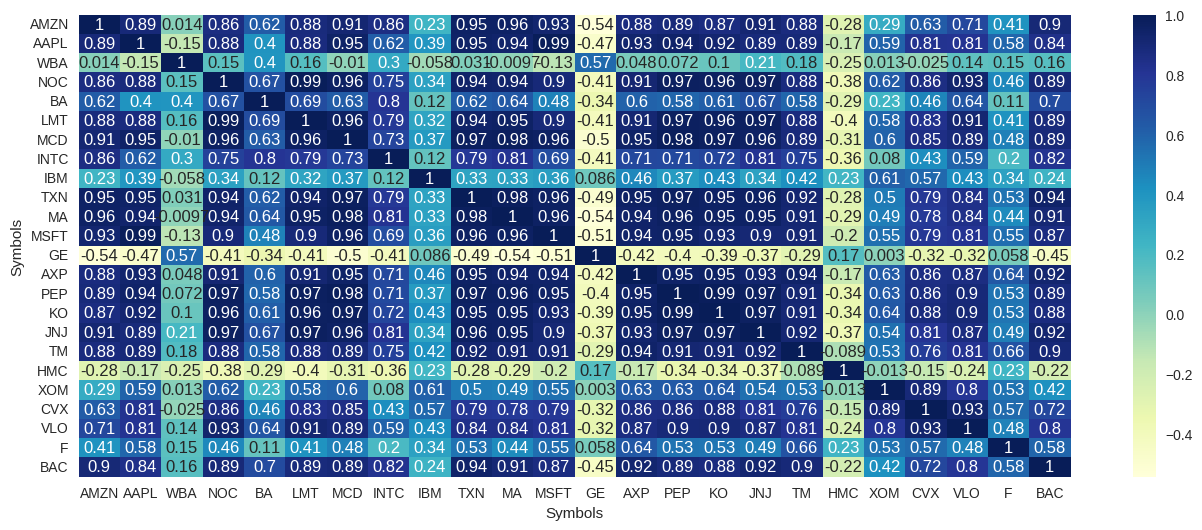

In [30]:
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.heatmap(df['High'].corr(numeric_only=True), cmap="YlGnBu", annot=True)

In [33]:
from sklearn.decomposition import PCA

In [34]:
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
labels = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(df['High'].columns)}).sort_values(by=['labels'],axis = 0)

In [35]:
df2

,labels,companies
17,0,TM
13,0,AXP
16,1,JNJ
15,1,KO
7,2,INTC
9,2,TXN
10,2,MA
21,3,VLO
20,3,CVX
19,3,XOM


In [36]:
len(labels)

24

<Figure size 800x550 with 0 Axes>

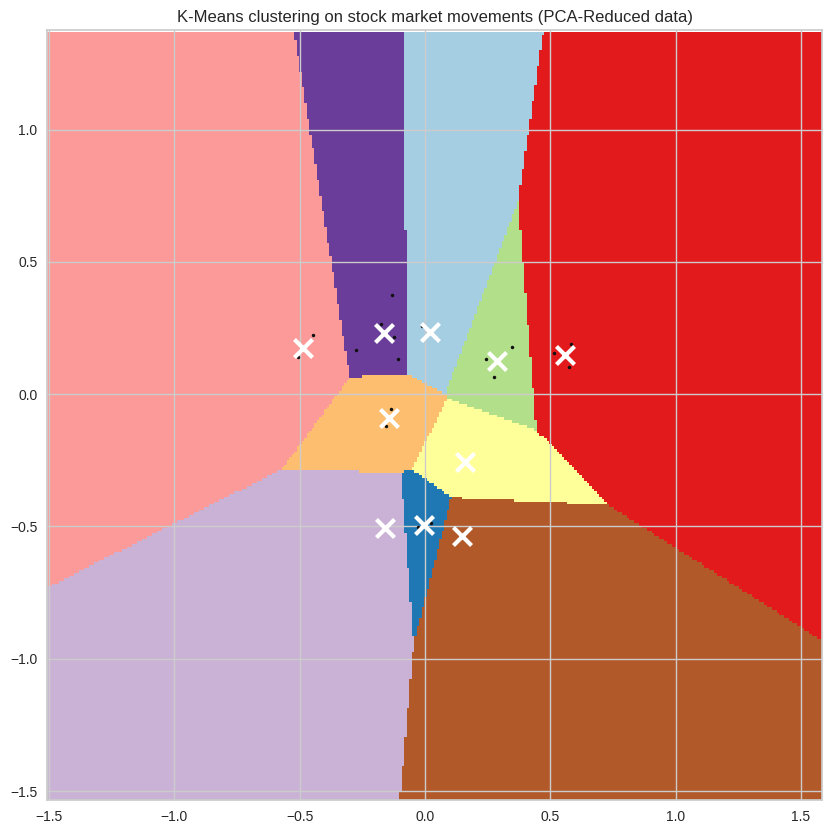

In [37]:

# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()